<a href="https://colab.research.google.com/github/sabiretutardemir/NLP/blob/main/NLP_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Uploading HarryPotter text data into variable

In [2]:
with open('/content/harry_potter.txt', 'r') as file:
    text_data = file.read()

In [3]:
print(text_data[:500])  # Prints the first 500 characters

CHAPTER ONE THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. 

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and 


# **Segment the text of the book into sentences. How many sentences does this book have?**

## **NLTK**

In [4]:
import nltk

 Punkt Tab divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
sentences= nltk.sent_tokenize(text_data)

In [12]:
len(sentences)

6394

## **spaCy**

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [14]:
text_data_nlp = nlp(text_data)
sentences_spacy = list(text_data_nlp.sents)
len(sentences_spacy)

6186

In [19]:
sentences[:10]

['CHAPTER ONE THE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.',
 "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 'Mr. Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 'The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 "They didn't think they could bear it if anyone found out about the Potters.",
 "Mrs. Pot

In [20]:
sentences_spacy[:10]

[CHAPTER ONE THE BOY WHO LIVED 
 
 Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.,
 They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. 
 ,
 Mr. Dursley was the director of a firm called Grunnings, which made drills.,
 He was a big, beefy man with hardly any neck, although he did have a very large mustache.,
 Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.,
 The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. 
 ,
 The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.,
 They didn't think they could bear it if anyone found out about the Potters.,
 Mrs. Potter was Mrs

# **Compute the frequency of each token in the book. What are the most frequent tokens?**

## **NLTK Tokens**

In [24]:
from nltk.tokenize import word_tokenize

In [26]:
tokens = word_tokenize(text_data)

In [28]:
len(tokens)

98774

In [29]:
counts  = nltk.FreqDist(tokens)
counts

FreqDist({',': 5658, '.': 5118, 'the': 3310, "''": 2443, '``': 2305, 'to': 1845, 'and': 1804, 'a': 1578, 'Harry': 1323, 'was': 1253, ...})

In [35]:
counts.most_common(10)

[(',', 5658),
 ('.', 5118),
 ('the', 3310),
 ("''", 2443),
 ('``', 2305),
 ('to', 1845),
 ('and', 1804),
 ('a', 1578),
 ('Harry', 1323),
 ('was', 1253)]

In [36]:
for word, frequency in counts.items():
    print(f"Word: {word}, Frequency: {frequency}")

Streaming output truncated to the last 5000 lines.
Word: burst, Frequency: 11
Word: tears, Frequency: 7
Word: Ickle, Frequency: 3
Word: Dudleykins, Frequency: 1
Word: handsome, Frequency: 2
Word: grown-up, Frequency: 1
Word: cracked, Frequency: 2
Word: laugh, Frequency: 6
Word: smell, Frequency: 12
Word: breakfast, Frequency: 11
Word: metal, Frequency: 3
Word: tub, Frequency: 2
Word: sink, Frequency: 2
Word: dirty, Frequency: 4
Word: rags, Frequency: 1
Word: swimming, Frequency: 2
Word: water, Frequency: 9
Word: tightened, Frequency: 2
Word: Your, Frequency: 13
Word: bowl, Frequency: 4
Word: DotA, Frequency: 1
Word: dyeing, Frequency: 1
Word: doubted, Frequency: 1
Word: argue, Frequency: 4
Word: elephant, Frequency: 1
Word: skin, Frequency: 5
Word: wrinkled, Frequency: 2
Word: noses, Frequency: 7
Word: banged, Frequency: 2
Word: Smelting, Frequency: 7
Word: stick, Frequency: 8
Word: click, Frequency: 1
Word: mail, Frequency: 14
Word: slot, Frequency: 3
Word: flop, Frequency: 1
Word: le

In [30]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print ("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 6844 types and 98774 tokens for a lexical diversity of 14.432


In [34]:
print(type(counts))

<class 'nltk.probability.FreqDist'>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


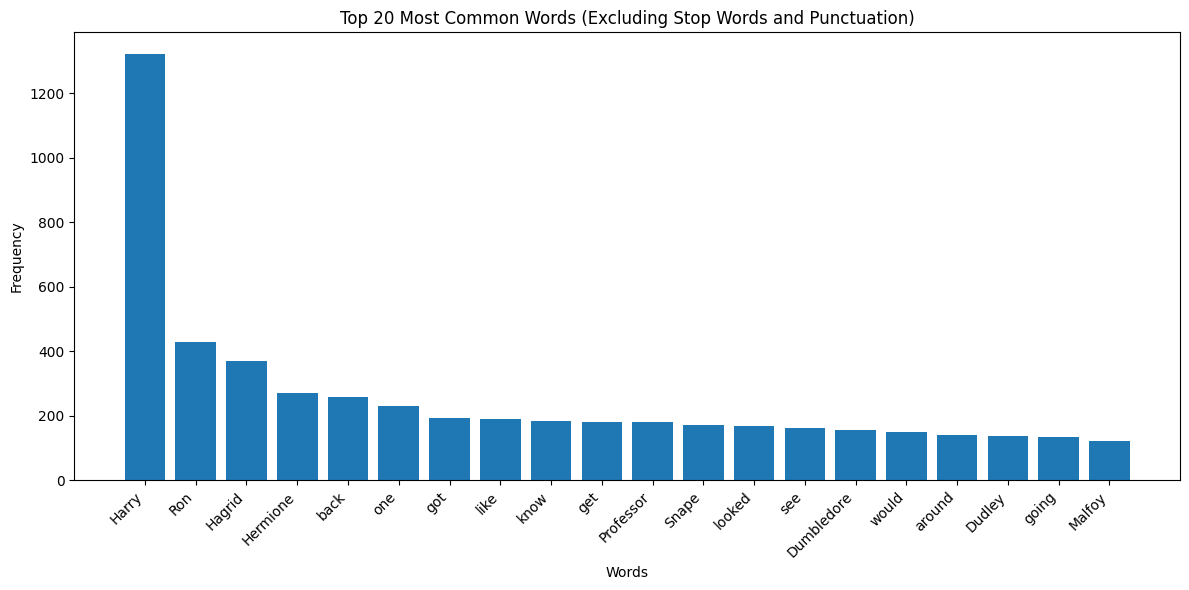

In [48]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
all_punctuation = string.punctuation + "''" + '``' + '--' + '...'
stop_words.update(["'s", "n't", "'d", 'could', 'said', "'ve", "'re", "'ll"])

# Filter out stop words and punctuation from tokens
filtered_tokens = [token for token in tokens
                   if token.lower() not in stop_words
                   and token not in all_punctuation
                   and len(token) > 1]
# Calculate frequency distribution for filtered tokens
filtered_counts = nltk.FreqDist(filtered_tokens)

# Get the 20 most common words
most_common_words = filtered_counts.most_common(20)

# Extract words and frequencies for plotting
words, frequencies = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words (Excluding Stop Words and Punctuation)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()